<a href="https://colab.research.google.com/github/kasireddyasam/AI-course-/blob/main/Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd


###give dataset is tab seperated its not in csv file.so we are giving names to columns which are tab(' ') seperated;

In [38]:
messages = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])

In [39]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##Experimental Data Analysis

In [40]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [41]:
messages.groupby(by='label').describe()  #all the unique label put together and show they details;

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [42]:
messages['length']= messages['message'].apply(len) # finding length of each message
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#Data Visualition

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Frequency'>

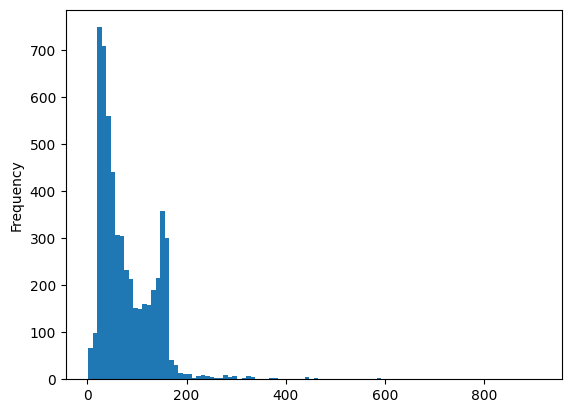

In [44]:
messages['length'].plot(bins=100,kind='hist')

In [45]:
messages.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [51]:
messages[messages['length']==910]['message'].iloc[0] # first conduction next which column you need

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

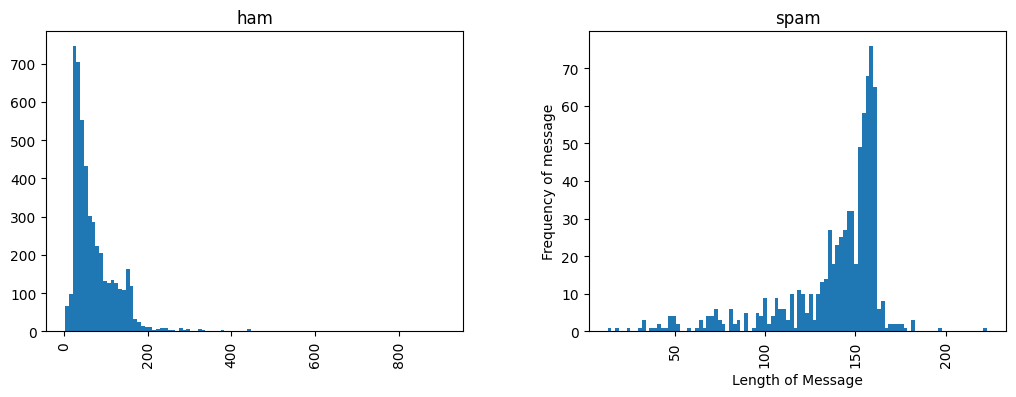

In [67]:
#plot the histogram for length and compare between ham and spam

messages.hist(column='length', by='label', bins=100,figsize=(12,4))
plt.xlabel("Length of Message")
plt.ylabel("Frequency of message")
plt.show()

**Frequency of short messages are more in ham,  Frequency of large messages are hight in spam**

# Text Processig

In [71]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [72]:
#break the sentence into words and rremove the words which are in stopwords
stopwords=nltk.corpus.stopwords.words('english') # stopwords is the list of words contains all the stopwords;
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [96]:
import string
punctuations=string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [97]:
sentence="heloo!! kasi how are doing?"
words=sentence.lower().split()
sentence=' '.join([word for word in words if word not in stopwords])
print(sentence)

heloo!! kasi doing?


In [98]:
print(''.join([char for char in sentence if char not in punctuations]))

heloo kasi doing


In [135]:
#messages['message'].apply(lambda x:''.join([char for char in x if char not in punctuations]))
#messages['message'].lower().split()
def text_process(message):
  nopunc=''.join([char for char in message if char not in punctuations])
  return ([words for words in nopunc.lower().split() if words not in stopwords])


In [136]:
messages["message"]=messages['message'].apply(text_process)
messages['message'].iloc[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

#vectorisation

## Three steps to convert lemmatization


*  Count how many times does a word occur in each message(Tf)
*  weight the count so that frequent tokens get lower weight
(Inverse document frequency(Idf)



In [137]:
from sklearn.feature_extraction.text import CountVectorizer # Countvectorizer is a matrix contains lot of zeros also called sparce matrix

In [138]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['message'])

In [139]:
len(bow_transformer.vocabulary_)

5112

In [140]:
message4=messages['message'][3]
print(message4)

['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']


In [141]:
print(bow_transformer.transform([message4]))


  (0, 4265)	1


giving no of alpha bets are repeted in message

In [146]:
print(bow_transformer.get_feature_names_out()[1279])

gojurongpointcrazyavailablebugisngreatworldlaebuffetcinegotamorewat


In [143]:
messages_bow=bow_transformer.transform(messages['message'])
messages_bow.shape

(5572, 5112)

In [144]:
print(messages_bow)

  (0, 1279)	1
  (1, 3031)	1
  (2, 1123)	1
  (3, 4265)	1
  (4, 2729)	1
  (5, 1140)	1
  (6, 1013)	1
  (7, 3178)	1
  (8, 4727)	1
  (9, 2665)	1
  (10, 2026)	1
  (11, 3671)	1
  (12, 4366)	1
  (13, 2137)	1
  (14, 711)	1
  (15, 4821)	1
  (16, 2910)	1
  (17, 973)	1
  (18, 1080)	1
  (19, 990)	1
  (20, 3582)	1
  (21, 2148)	1
  (22, 5092)	1
  (23, 121)	1
  (24, 1063)	1
  :	:
  (5547, 625)	1
  (5548, 4222)	1
  (5549, 2300)	1
  (5550, 641)	1
  (5551, 4675)	1
  (5552, 3480)	1
  (5553, 1492)	1
  (5554, 4648)	1
  (5555, 4912)	1
  (5556, 4971)	1
  (5557, 2592)	1
  (5558, 3744)	1
  (5559, 266)	1
  (5560, 243)	1
  (5561, 1216)	1
  (5562, 3045)	1
  (5563, 264)	1
  (5564, 890)	1
  (5565, 1925)	1
  (5566, 3415)	1
  (5567, 46)	1
  (5568, 5068)	1
  (5569, 3196)	1
  (5570, 1458)	1
  (5571, 3446)	1


In [145]:
messages_bow.nnz # no of non zeros occurences in sparse matrix;

5567

#step 2
* weight the count so that frequent tokens get lower weight (Inverse document frequency(Idf)